In [ ]:
# --- Importação de bibliotecas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configurações de exibição ---
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# --- Carregando o dataset ---
df = pd.read_csv('youtube_views.csv')
df.head()


In [ ]:
# --- Visão geral do dataset ---

# Exibe informações gerais: número de entradas, tipos de dados e valores nulos
df.info()

# Exibe o número total de linhas e colunas (dimensão do dataset)
print("\nDimensão do dataset (linhas, colunas):", df.shape)

# Exibe estatísticas descritivas das colunas numéricas
df.describe()


In [ ]:
# Listar colunas
print("\nColunas disponíveis:")
print(df.columns.tolist())

1-Análise de Valores Faltantes

In [ ]:
#analise de valores faltantes

# Contagem de valores nulos
df.isnull().sum()


# Percentual de valores nulos
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

# Visualização dos valores faltantes
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes no Dataset')
plt.show()

In [ ]:
# Distribuição das visualizações
plt.figure(figsize=(8,5))
sns.histplot(df['total_views'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Visualizações dos Vídeos no YouTube')
plt.xlabel('Número de Visualizações')
plt.ylabel('Quantidade de Vídeos')
plt.show()


2-Análise da Variável Alvo (total_views)

In [ ]:
#analise de variavel alvo
df['total_views'].describe()

#verificar distribuição da variavel alvo
sns.histplot(df['total_views'], bins=30, kde=True, color='salmon')
plt.title('Distribuição das Visualizações (total_views)')
plt.show()


In [ ]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_views'], color='lightblue')
plt.title('Boxplot - Visualizações dos Vídeos')
plt.xlabel('Número de Visualizações')
plt.show()


In [ ]:
# Estatísticas descritivas
print("Estatísticas descritivas:")
print(df['total_views'].describe())

In [ ]:
# Assimetria e curtose
print("\nSkewness:", df['total_views'].skew())
print("Kurtosis:", df['total_views'].kurt())


3-Análise Univariada - Variáveis Numéricas

In [ ]:
# Define a variável alvo
target = 'total_views'

# Seleciona apenas as colunas numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Análise univariada - variáveis numéricas

for col in num_vars:
    if col != target:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], kde=True, color='steelblue')
        plt.title(f'Distribuição da variável {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.show()
        
        print(f"\n {col} - Estatísticas:")
        print(df[col].describe())
        print(f"Skewness: {df[col].skew():.2f}")
        print("-" * 50)


4-análise Univariada - Variáveis Categóricas

In [ ]:
#analise univariada - variaveis categoricas
df['language'].value_counts(normalize=True) * 100
sns.countplot(x='language', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#analise univariada - variaveis categóricas
df['language'].value_counts(normalize=True) * 100
sns.countplot(x='language', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Separar variáveis numéricas e categóricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
cat_vars = df.select_dtypes(include=['object', 'bool']).columns

print("\nVariáveis numéricas:", num_vars.tolist())
print("\nVariáveis categóricas:", cat_vars.tolist())

5-Análise de Correlações

In [ ]:
#analise de correlações
corr = df[num_vars].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


6-Análise Bivariada (Features vs Target)


In [ ]:
#analise bivariada

# Exemplo com variáveis numéricas
for col in ['likes_count', 'comments_count', 'shares_count']:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f'Relação entre {col} e {target}')
    plt.xlabel(col)
    plt.ylabel('Visualizações')
    plt.show()


In [ ]:
# Exemplo com categóricas
plt.figure(figsize=(8,5))
sns.boxplot(x='promoted', y=target, data=df, palette='Set2')
plt.title('Visualizações x Promoção')
plt.xlabel('Promovido')
plt.ylabel('Total de Visualizações')
plt.show()

7-Identificação de Outliers

In [ ]:
#indentificar os outliers
for col in num_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    perc = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({perc:.2f}%)")

#Etapa 2: Pré-processamento de Dados

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de exibição
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')


In [5]:
df = pd.read_csv('youtube_views.csv')
df.head()

,video_id,duration_minutes,title_length,description_length,tags_count,has_thumbnail_custom,video_quality,category,language,has_subtitles,channel_subscribers,channel_age_months,previous_videos_count,avg_upload_frequency_days,comments_count,likes_count,shares_count,playlist_adds,promoted,upload_time,upload_day,total_views
0,VID00197,3,53,589.0,34.0,Sim,720p,Fitness,Português,Não,474,NaN,406,9,2804.0,5269,NaN,624,Não,Tarde,Sexta,2219779
1,VID00987,60,95,NaN,17.0,Não,720p,Culinária,Português,Não,899904,NaN,25,14,9634.0,9448,1679.0,894,Sim,Tarde,Sexta,719904
2,VID01091,47,35,168.0,20.0,Não,1080p,Gaming,Espanhol,Não,761732,59.0,59,1,6943.0,34028,542.0,540,Não,Manhã,Seg-Qui,1420456
3,VID00388,8,12,260.0,4.0,Sim,1080p,Tecnologia,Português,Sim,154261,84.0,93,10,9427.0,42695,3096.0,188,Não,Madrugada,Sábado,329746
4,VID02222,56,94,648.0,48.0,Não,720p,Vlogs,Espanhol,Não,843352,6.0,205,13,2993.0,40761,311.0,957,Não,Manhã,Domingo,984985


1: Verificação Inicial dos Dados


In [6]:
# --- Estrutura e informações básicas ---
df.info()

# --- Estatísticas descritivas ---
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   video_id                   2520 non-null   object 
 1   duration_minutes           2520 non-null   int64  
 2   title_length               2520 non-null   int64  
 3   description_length         2480 non-null   float64
 4   tags_count                 2480 non-null   float64
 5   has_thumbnail_custom       2520 non-null   object 
 6   video_quality              2520 non-null   object 
 7   category                   2520 non-null   object 
 8   language                   2520 non-null   object 
 9   has_subtitles              2520 non-null   object 
 10  channel_subscribers        2520 non-null   int64  
 11  channel_age_months         2480 non-null   float64
 12  previous_videos_count      2520 non-null   int64  
 13  avg_upload_frequency_days  2520 non-null   int64

,video_id,duration_minutes,title_length,description_length,tags_count,has_thumbnail_custom,video_quality,category,language,has_subtitles,channel_subscribers,channel_age_months,previous_videos_count,avg_upload_frequency_days,comments_count,likes_count,shares_count,playlist_adds,promoted,upload_time,upload_day,total_views
count,2520,2520.000000,2520.000000,2480.000000,2480.000000,2520,2520,2520,2520,2520,2.520000e+03,2480.000000,2520.000000,2520.000000,2480.000000,2520.000000,2480.000000,2520.000000,2520,2520,2520,2.520000e+03
unique,2520,NaN,NaN,NaN,NaN,2,5,14,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,4,NaN
top,VID00197,NaN,NaN,NaN,NaN,Sim,1080p,Fitness,Português,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Manhã,Domingo,NaN
freq,1,NaN,NaN,NaN,NaN,1734,1284,404,1513,1477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2138,683,662,NaN
mean,NaN,31.942460,54.436111,536.062097,24.715726,NaN,NaN,NaN,NaN,NaN,5.119479e+05,59.449194,247.055952,15.711905,4888.475000,25141.834127,2487.693952,499.431746,NaN,NaN,NaN,8.604780e+05
std,NaN,18.598756,26.116815,275.770823,14.709814,NaN,NaN,NaN,NaN,NaN,3.874734e+05,34.950178,146.125772,8.723234,2851.615977,14640.476699,1433.503747,293.222464,NaN,NaN,NaN,7.019594e+05
min,NaN,-7.000000,10.000000,50.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-8.440000e+02,1.000000,0.000000,1.000000,6.000000,-259.000000,0.000000,0.000000,NaN,NaN,NaN,8.522200e+04
25%,NaN,17.000000,31.750000,295.000000,12.000000,NaN,NaN,NaN,NaN,NaN,2.356905e+05,30.000000,117.000000,8.000000,2502.000000,12304.250000,1277.000000,238.000000,NaN,NaN,NaN,4.054298e+05
50%,NaN,32.000000,54.000000,535.000000,24.000000,NaN,NaN,NaN,NaN,NaN,4.995060e+05,59.000000,249.500000,16.000000,4845.000000,25031.500000,2469.500000,500.000000,NaN,NaN,NaN,6.460430e+05
75%,NaN,46.000000,77.000000,775.000000,37.250000,NaN,NaN,NaN,NaN,NaN,7.558422e+05,89.000000,370.000000,23.000000,7317.750000,37916.500000,3736.250000,755.000000,NaN,NaN,NaN,1.084820e+06


Neste passo, o dataset youtube_views.csv é carregado no ambiente usando pandas.
Também são exibidas as 5 primeiras linhas do conjunto de dados para ter uma visão geral de como estão as variáveis (colunas) e os tipos de dados.


2: Análise de Valores Ausentes (Missing Values)

In [7]:
# --- Contagem de valores ausentes ---
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_data = pd.DataFrame({'Valores Ausentes': missing, 'Porcentagem (%)': missing_percent})
missing_data[missing_data['Valores Ausentes'] > 0]


,Valores Ausentes,Porcentagem (%)
description_length,40,1.587302
tags_count,40,1.587302
channel_age_months,40,1.587302
comments_count,40,1.587302
shares_count,40,1.587302


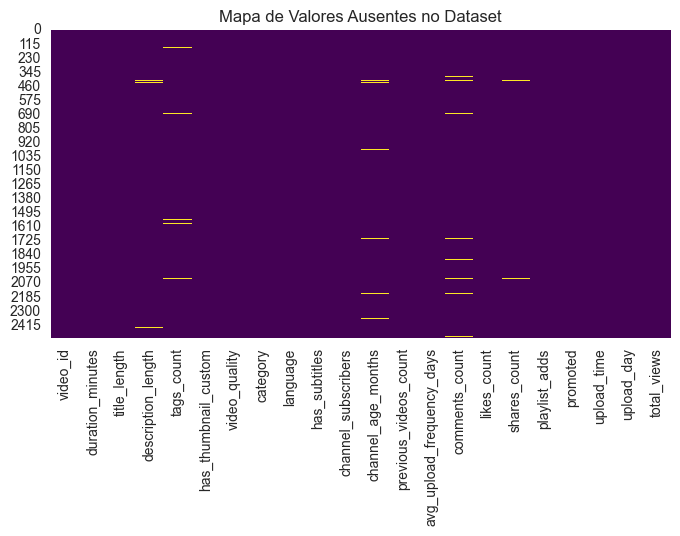

In [8]:
# --- Visualização dos valores ausentes ---
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Ausentes no Dataset')
plt.show()
#Cada linha representa um vídeo.
#Os espaços amarelos indicam valores ausentes nas respectivas colunas.

 O gráfico acima mostra um mapa de calor (heatmap) indicando os valores ausentes no dataset.
 Cada linha representa um registro (vídeo) e cada coluna representa uma variável.
 As áreas brancas representam valores presentes, enquanto as áreas vermelhas indicam dados ausentes (NaN).


3: Tratamento de Valores Ausentes

In [9]:
#Etapa 2.3 – Tratamento de valores ausentes (corrigido para evitar FutureWarning)

# Preenche valores nulos em colunas numéricas com a mediana
df['description_length'] = df['description_length'].fillna(df['description_length'].median())
df['tags_count'] = df['tags_count'].fillna(df['tags_count'].median())

# Preenche valores nulos em colunas categóricas com o valor mais frequente (moda)
categorical_cols = ['category', 'video_quality', 'has_thumbnail_custom']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verifica novamente se ainda há valores nulos
df.isnull().sum()


video_id                      0
duration_minutes              0
title_length                  0
description_length            0
tags_count                    0
has_thumbnail_custom          0
video_quality                 0
category                      0
language                      0
has_subtitles                 0
channel_subscribers           0
channel_age_months           40
previous_videos_count         0
avg_upload_frequency_days     0
comments_count               40
likes_count                   0
shares_count                 40
playlist_adds                 0
promoted                      0
upload_time                   0
upload_day                    0
total_views                   0
dtype: int64

Após identificar valores nulos, eles são tratados com estratégias adequadas:

Colunas numéricas → preenchidas com a mediana.

Colunas categóricas → preenchidas com o valor mais frequente (moda).


4: Remoção de Duplicatas

In [10]:
# --- Verificando duplicatas ---
print(f"Duplicatas encontradas: {df.duplicated().sum()}")

# --- Removendo duplicatas ---
df.drop_duplicates(inplace=True)
print(f"Após remoção: {df.duplicated().sum()}")


Duplicatas encontradas: 0
Após remoção: 0


5: Detecção e Tratamento de Outliers

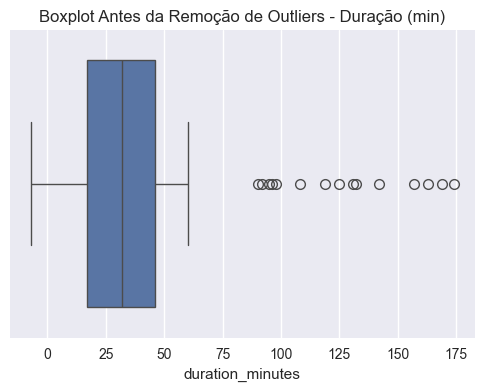

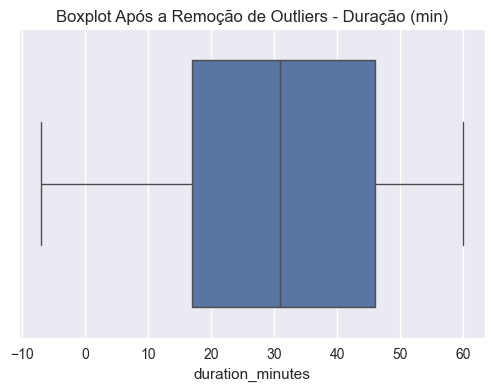

In [11]:
# --- Função para remover outliers numéricos ---
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# --- Visualizando antes ---
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='duration_minutes')
plt.title('Boxplot Antes da Remoção de Outliers - Duração (min)')
plt.show()

# --- Removendo ---
df = remove_outliers_iqr(df, 'duration_minutes')

# --- Visualizando depois ---
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='duration_minutes')
plt.title('Boxplot Após a Remoção de Outliers - Duração (min)')
plt.show()
#O boxplot mostra a distribuição da duração dos vídeos.
#Pontos fora da caixa (antes) são outliers que foram removidos (depois).

(Antes da Remoção)

O boxplot acima mostra a distribuição original da duração dos vídeos.
 Observa-se a presença de vários pontos isolados acima do limite superior do boxplot,
 representando vídeos com duração muito maior que o padrão (outliers).



(Depois da Remoção)

 Após remover os outliers com base no método IQR, observa-se que o boxplot está mais "compacto",
 sem pontos extremos fora do limite superior.


6: Correção de Distribuições Assimétricas (Skewness)

duration_minutes     -0.033850
title_length          0.050409
description_length   -0.007863
tags_count            0.037799
dtype: float64


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


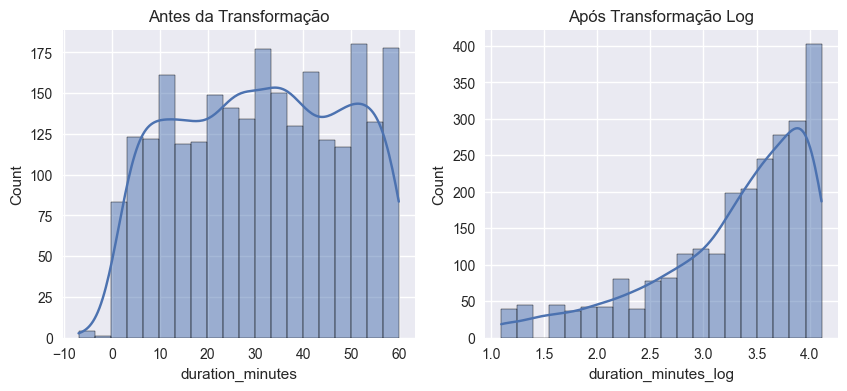

In [12]:
# --- Medindo assimetria ---
skewness = df[['duration_minutes', 'title_length', 'description_length', 'tags_count']].skew()
print(skewness)

# --- Transformação log ---
df['duration_minutes_log'] = np.log1p(df['duration_minutes'])
df['tags_count_log'] = np.log1p(df['tags_count'])

# --- Comparando distribuições antes e depois ---
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['duration_minutes'], ax=ax[0], bins=20, kde=True)
sns.histplot(df['duration_minutes_log'], ax=ax[1], bins=20, kde=True)
ax[0].set_title('Antes da Transformação')
ax[1].set_title('Após Transformação Log')
plt.show()
#A transformação logarítmica reduz a assimetria, aproximando a distribuição da normal.

(Antes da Transformação)

As distribuições apresentadas acima são fortemente assimétricas à direita.
Isso significa que a maioria dos vídeos tem duração ou quantidade de tags baixa,
mas há alguns casos extremos com valores muito altos (cauda longa à direita).


(Depois da Transformação Log)

Após aplicar a transformação logarítmica (np.log1p), observamos que as distribuições
 se tornaram mais equilibradas e próximas da forma normal.
 A cauda longa foi reduzida, e os valores passaram a se concentrar em torno da média.

7: Codificação de Variáveis Categóricas

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['has_thumbnail_custom', 'video_quality']:
    df[col] = le.fit_transform(df[col])

df.head()


,video_id,duration_minutes,title_length,description_length,tags_count,has_thumbnail_custom,video_quality,category,language,has_subtitles,channel_subscribers,channel_age_months,previous_videos_count,avg_upload_frequency_days,comments_count,likes_count,shares_count,playlist_adds,promoted,upload_time,upload_day,total_views,duration_minutes_log,tags_count_log
0,VID00197,3,53,589.0,34.0,1,4,Fitness,Português,Não,474,NaN,406,9,2804.0,5269,NaN,624,Não,Tarde,Sexta,2219779,1.386294,3.555348
1,VID00987,60,95,535.0,17.0,0,4,Culinária,Português,Não,899904,NaN,25,14,9634.0,9448,1679.0,894,Sim,Tarde,Sexta,719904,4.110874,2.890372
2,VID01091,47,35,168.0,20.0,0,0,Gaming,Espanhol,Não,761732,59.0,59,1,6943.0,34028,542.0,540,Não,Manhã,Seg-Qui,1420456,3.871201,3.044522
3,VID00388,8,12,260.0,4.0,1,0,Tecnologia,Português,Sim,154261,84.0,93,10,9427.0,42695,3096.0,188,Não,Madrugada,Sábado,329746,2.197225,1.609438
4,VID02222,56,94,648.0,48.0,0,4,Vlogs,Espanhol,Não,843352,6.0,205,13,2993.0,40761,311.0,957,Não,Manhã,Domingo,984985,4.043051,3.891820


Nesta etapa, variáveis do tipo texto (como video_quality ou has_thumbnail_custom) são transformadas em números usando Label Encoding.


8: Normalização de Variáveis Numéricas

In [14]:
# --- Tratando valores infinitos e ausentes antes da normalização ---
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['duration_minutes_log', 'title_length', 'description_length', 'tags_count_log'], inplace=True)

# --- Importando StandardScaler ---
from sklearn.preprocessing import StandardScaler

# --- Normalização dos Dados Numéricos ---
scaler = StandardScaler()

numeric_cols = ['duration_minutes_log', 'title_length', 'description_length', 'tags_count_log']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].head()


,duration_minutes_log,title_length,description_length,tags_count_log
0,-2.579794,-0.055385,0.193161,0.658463
1,1.142873,1.551973,-0.004344,-0.097832
2,0.815401,-0.744253,-1.346645,0.077487
3,-1.471798,-1.624473,-1.010156,-1.554673
4,1.050205,1.513703,0.408954,1.041142


As colunas numéricas passam por uma normalização (StandardScaler) para que todas fiquem na mesma escala (média = 0, desvio padrão = 1).


9: Salvando Dataset Limpo

In [15]:
# --- Criando pasta 'data' caso não exista ---
import os

os.makedirs('../data', exist_ok=True)

# --- Salvando dataset limpo ---
df.to_csv('../data/students_clean.csv', index=False)
print(" Dataset limpo salvo em: data/students_clean.csv")


 Dataset limpo salvo em: data/students_clean.csv


In [20]:
import pandas as pd

df_clean = pd.read_csv("../data/students_clean.csv")
df_clean.head()


,video_id,duration_minutes,title_length,description_length,tags_count,has_thumbnail_custom,video_quality,category,language,has_subtitles,channel_subscribers,channel_age_months,previous_videos_count,avg_upload_frequency_days,comments_count,likes_count,shares_count,playlist_adds,promoted,upload_time,upload_day,total_views,duration_minutes_log,tags_count_log
0,VID00197,3,-0.055385,0.193161,34.0,1,4,Fitness,Português,Não,474,NaN,406,9,2804.0,5269,NaN,624,Não,Tarde,Sexta,2219779,-2.579794,0.658463
1,VID00987,60,1.551973,-0.004344,17.0,0,4,Culinária,Português,Não,899904,NaN,25,14,9634.0,9448,1679.0,894,Sim,Tarde,Sexta,719904,1.142873,-0.097832
2,VID01091,47,-0.744253,-1.346645,20.0,0,0,Gaming,Espanhol,Não,761732,59.0,59,1,6943.0,34028,542.0,540,Não,Manhã,Seg-Qui,1420456,0.815401,0.077487
3,VID00388,8,-1.624473,-1.010156,4.0,1,0,Tecnologia,Português,Sim,154261,84.0,93,10,9427.0,42695,3096.0,188,Não,Madrugada,Sábado,329746,-1.471798,-1.554673
4,VID02222,56,1.513703,0.408954,48.0,0,4,Vlogs,Espanhol,Não,843352,6.0,205,13,2993.0,40761,311.0,957,Não,Manhã,Domingo,984985,1.050205,1.041142
